## DATA EXPLORATION


In [2]:
import pandas as pd

In [3]:
# Load the CSV file
file_path = 'data/crop_data_.csv'
new_data_cleaned = pd.read_csv(file_path)

# Reshape the data to long format
reshaped_data = pd.melt(new_data_cleaned, id_vars=['Type', 'Geolocation', 'Item'], 
                        var_name='Year', value_name='Cost Value')

# Extract 'Dry', 'Wet', 'Average' as seasons and retain them
reshaped_data['Season'] = reshaped_data['Year'].str.extract(r'(Dry|Wet|Average)')
reshaped_data['Year'] = reshaped_data['Year'].str.replace('Dry ', '').str.replace('Wet ', '').str.replace('Average ', '').astype(int)

# Clean the 'Item' column by removing unnecessary ".." and spaces
reshaped_data['Item'] = reshaped_data['Item'].str.replace("..", "").str.strip()

# Filter the 'Item' column to only include relevant categories
relevant_items = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS', 
    'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS', 
    'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
    'Farmgate price (pesos/kg)'
]
reshaped_data = reshaped_data[reshaped_data['Item'].isin(relevant_items)]

# Pivot the data to have separate columns for the relevant categories
pivot_data = reshaped_data.pivot_table(index=['Year', 'Type', 'Geolocation', 'Season'], 
                                       columns='Item', 
                                       values='Cost Value', 
                                       aggfunc='first').reset_index()

# Clean the 'Type' and 'Geolocation' columns
pivot_data['Type'] = pivot_data['Type'].str.replace('All ', '')

# Sort by Year and then Season
pivot_data = pivot_data.sort_values(by=['Year', 'Type'])

# Reorder columns as specified
final_data = pivot_data[['Year', 'Type', 'Geolocation', 'Season', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS',
                         'TOTAL COSTS', 'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS',
                         'NET RETURNS', 'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)',
                         'Farmgate price (pesos/kg)']]

# Display the final reshaped data
final_data.head()

Item,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg)
0,2002,Corn,PHILIPPINES,Average,5430,1377,4008,10815,13554,8124,6747,2739,0.25,5.65,1915,7.08
1,2002,Corn,PHILIPPINES,Dry,5255,1355,4535,11145,14096,8841,7486,2951,0.26,5.59,1994,7.07
2,2002,Corn,PHILIPPINES,Wet,5594,1398,3516,10508,13046,7452,6054,2538,0.24,5.7,1842,7.08
6,2002,Irrigated Palay,PHILIPPINES,Average,10618,7593,5354,23565,30897,20279,12686,7332,0.31,6.66,3539,8.73
7,2002,Irrigated Palay,PHILIPPINES,Dry,10371,7663,5828,23862,31076,20705,13042,7214,0.3,6.85,3485,8.92


## Population Data

In [4]:
# Load the population CSV file
file_path = 'data/population.csv'  
population_data = pd.read_csv(file_path)

# Convert the 'date' column to datetime and extract the year
population_data['date'] = pd.to_datetime(population_data['date'])
population_data['Year'] = population_data['date'].dt.year

# Remove leading/trailing spaces from column names
population_data.columns = population_data.columns.str.strip()

# Filter the data to include only years between 2002 and 2021
filtered_population_data = population_data[(population_data['Year'] >= 2002) & (population_data['Year'] <= 2021)]

# Select relevant columns ('Year', 'Population', 'Annual % Change')
filtered_population_data = filtered_population_data[['Year', 'Population', 'Annual % Change']]

filtered_population_data.head()

,Year,Population,Annual % Change
52,2002,81285572,2.08
53,2003,82942837,2.04
54,2004,84607501,2.01
55,2005,86261250,1.95
56,2006,87901835,1.90


## Merge Data

In [5]:
# Merge the population data into your crop dataset based on 'Year'
merged_data = pd.merge(final_data, filtered_population_data, how='left', on='Year')
merged_data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430,1377,4008,10815,13554,8124,6747,2739,0.25,5.65,1915,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255,1355,4535,11145,14096,8841,7486,2951,0.26,5.59,1994,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594,1398,3516,10508,13046,7452,6054,2538,0.24,5.7,1842,7.08,81285572,2.08
3,2002,Irrigated Palay,PHILIPPINES,Average,10618,7593,5354,23565,30897,20279,12686,7332,0.31,6.66,3539,8.73,81285572,2.08
4,2002,Irrigated Palay,PHILIPPINES,Dry,10371,7663,5828,23862,31076,20705,13042,7214,0.3,6.85,3485,8.92,81285572,2.08


In [6]:
# merged_data.to_csv('data/merged_data.csv', index=False)

## Data Pre-processing

In [7]:
# Check for missing values in the merged dataset
merged_data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [8]:
merged_data.dtypes

Year                                       int32
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                                object
NON-CASH COSTS                            object
IMPUTED COSTS                             object
TOTAL COSTS                               object
GROSS RETURNS                             object
RETURNS ABOVE CASH COSTS                  object
RETURNS ABOVE CASH AND NON-CASH COSTS     object
NET RETURNS                               object
NET PROFIT-COST RATIO                     object
Cost per kilogram (pesos)                 object
Yield per hectare (kg)                    object
Farmgate price (pesos/kg)                 object
Population                                 int64
Annual % Change                          float64
dtype: object

In [9]:
# Convert object columns to numeric, forcing errors to NaN (in case of any non-numeric values)
columns_to_convert = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                      'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                      'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                      'Farmgate price (pesos/kg)']

# Convert the columns to numeric, forcing errors='coerce' to handle any invalid parsing
merged_data[columns_to_convert] = merged_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
merged_data.isnull().sum()

Year                                       0
Type                                       0
Geolocation                                0
Season                                     0
CASH COSTS                                78
NON-CASH COSTS                            78
IMPUTED COSTS                             78
TOTAL COSTS                               78
GROSS RETURNS                             78
RETURNS ABOVE CASH COSTS                  78
RETURNS ABOVE CASH AND NON-CASH COSTS     78
NET RETURNS                               78
NET PROFIT-COST RATIO                     78
Cost per kilogram (pesos)                 78
Yield per hectare (kg)                    78
Farmgate price (pesos/kg)                108
Population                                 0
Annual % Change                            0
dtype: int64

In [11]:
merged_data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Corn,PHILIPPINES,Average,5430.0,1377.0,4008.0,10815.0,13554.0,8124.0,6747.0,2739.0,0.25,5.65,1915.0,7.08,81285572,2.08
1,2002,Corn,PHILIPPINES,Dry,5255.0,1355.0,4535.0,11145.0,14096.0,8841.0,7486.0,2951.0,0.26,5.59,1994.0,7.07,81285572,2.08
2,2002,Corn,PHILIPPINES,Wet,5594.0,1398.0,3516.0,10508.0,13046.0,7452.0,6054.0,2538.0,0.24,5.70,1842.0,7.08,81285572,2.08
3,2002,Irrigated Palay,PHILIPPINES,Average,10618.0,7593.0,5354.0,23565.0,30897.0,20279.0,12686.0,7332.0,0.31,6.66,3539.0,8.73,81285572,2.08
4,2002,Irrigated Palay,PHILIPPINES,Dry,10371.0,7663.0,5828.0,23862.0,31076.0,20705.0,13042.0,7214.0,0.30,6.85,3485.0,8.92,81285572,2.08


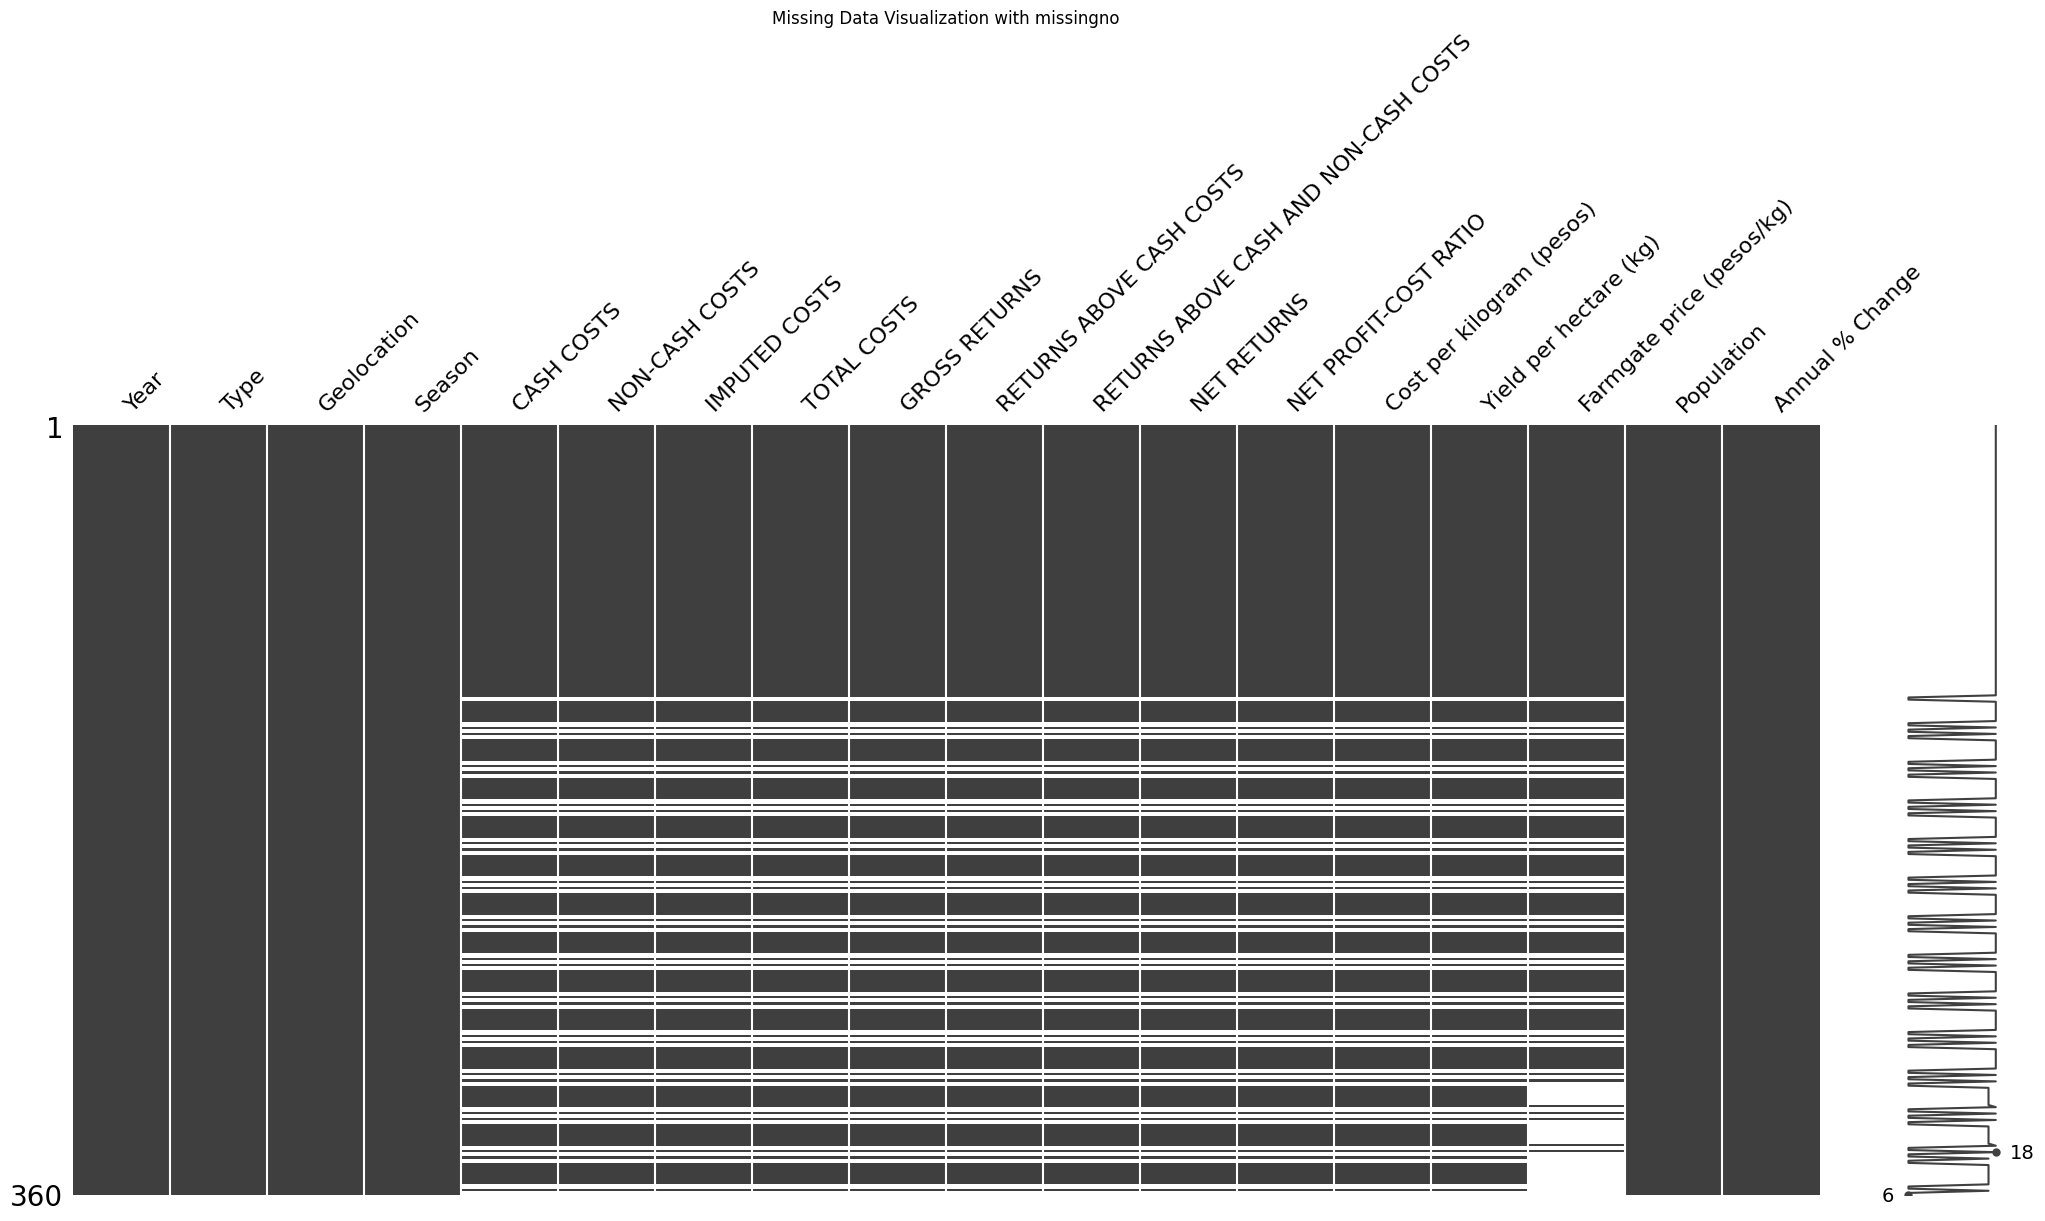

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno
msno.matrix(merged_data)
plt.title('Missing Data Visualization with missingno')
plt.show()

In [13]:
# Impute the specified columns using median imputation first
columns_to_impute_median = ['CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                            'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                            'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                            'Farmgate price (pesos/kg)']

# Apply median imputation
merged_data[columns_to_impute_median] = merged_data[columns_to_impute_median].fillna(merged_data[columns_to_impute_median].median())

# Now check how many missing values remain
merged_data.isnull().sum()


Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [14]:
import seaborn as sns

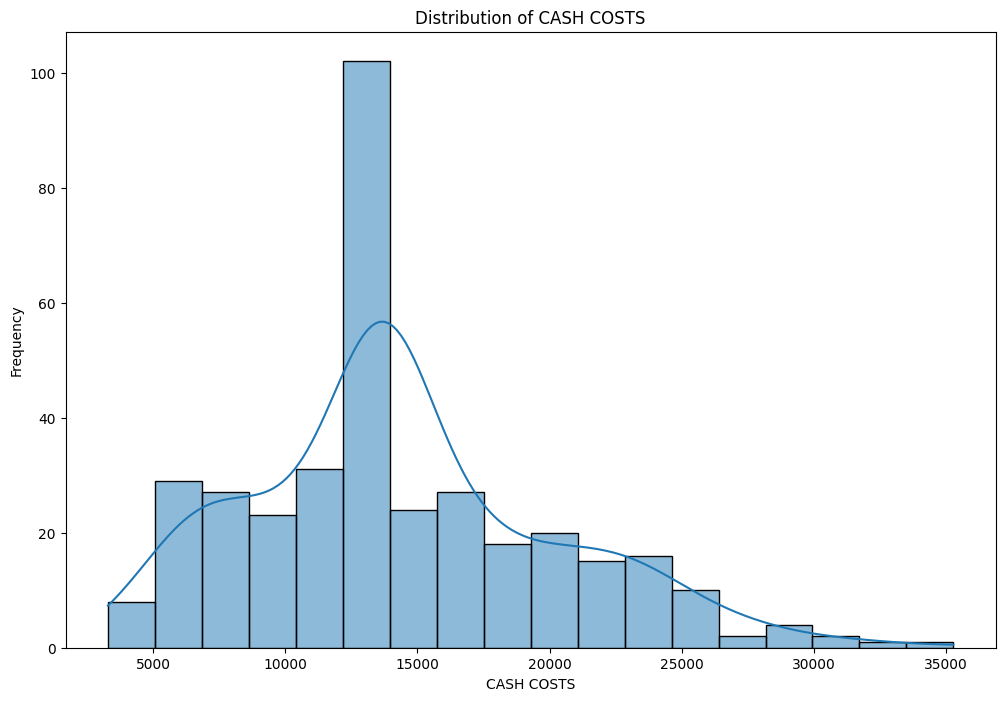

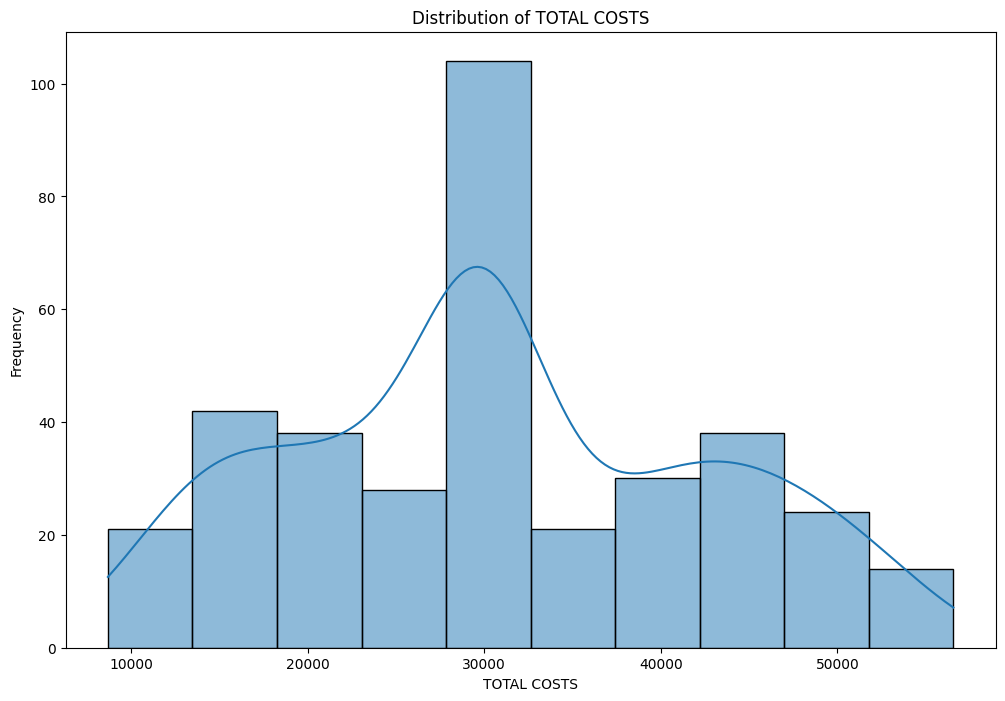

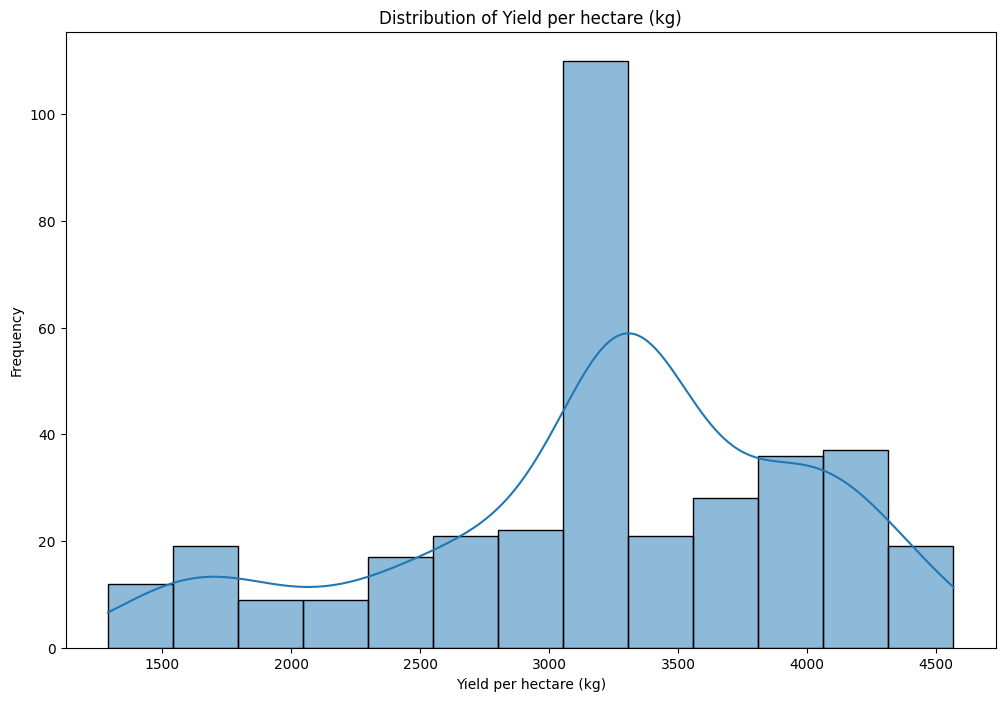

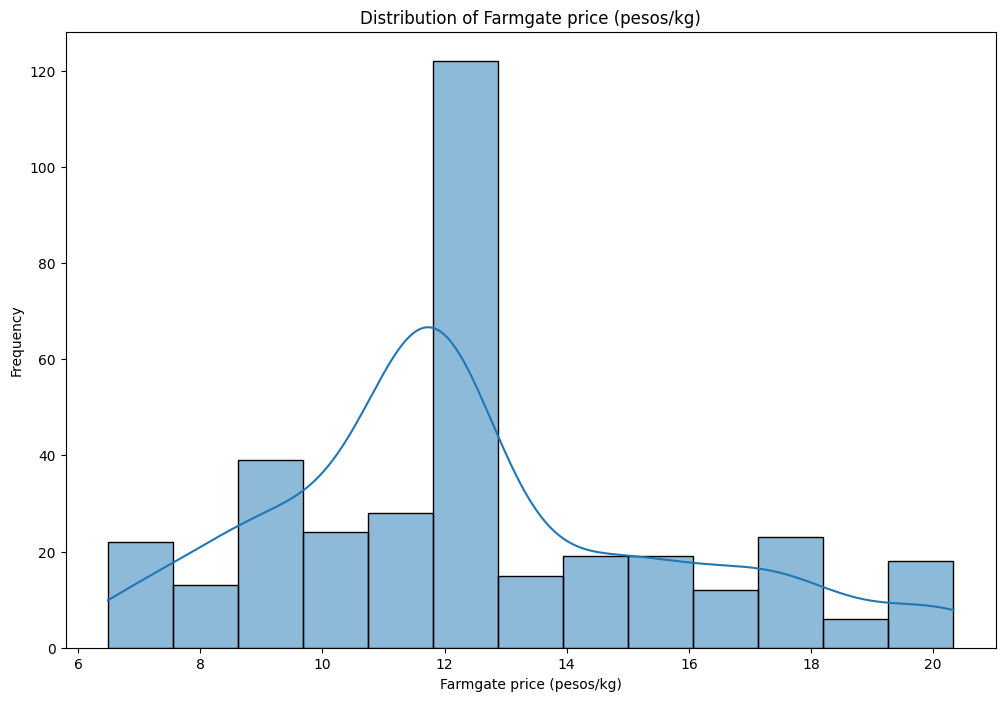

In [15]:
# Plot distribution of key numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(merged_data['CASH COSTS'], kde=True)
plt.title('Distribution of CASH COSTS')
plt.xlabel('CASH COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(merged_data['TOTAL COSTS'], kde=True)
plt.title('Distribution of TOTAL COSTS')
plt.xlabel('TOTAL COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(merged_data['Yield per hectare (kg)'], kde=True)
plt.title('Distribution of Yield per hectare (kg)')
plt.xlabel('Yield per hectare (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(merged_data['Farmgate price (pesos/kg)'], kde=True)
plt.title('Distribution of Farmgate price (pesos/kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Frequency')
plt.show()

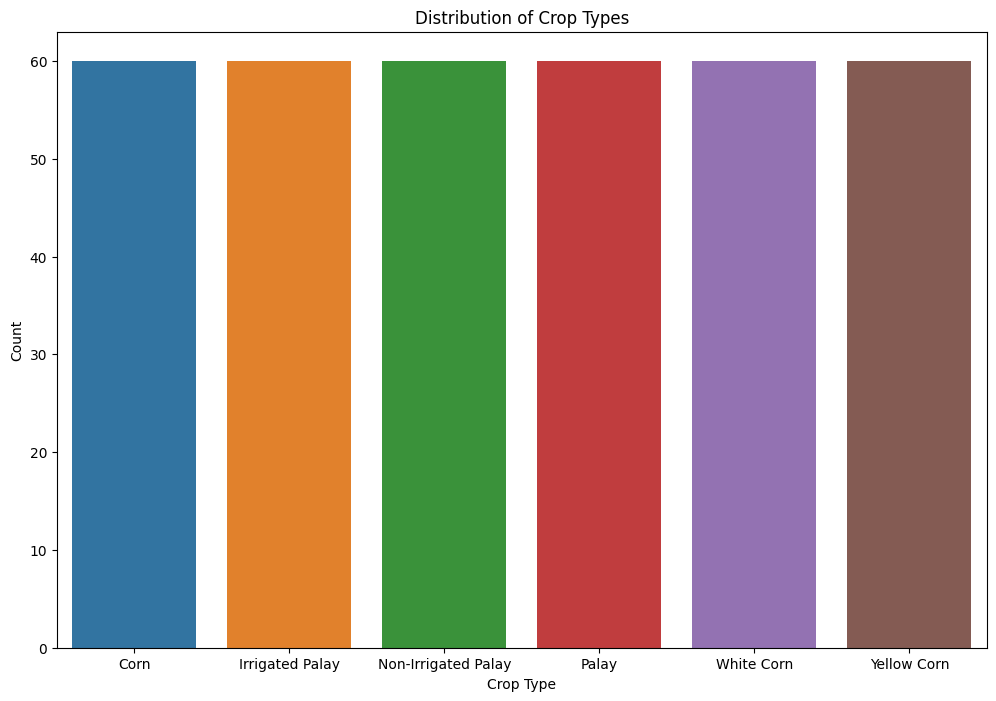

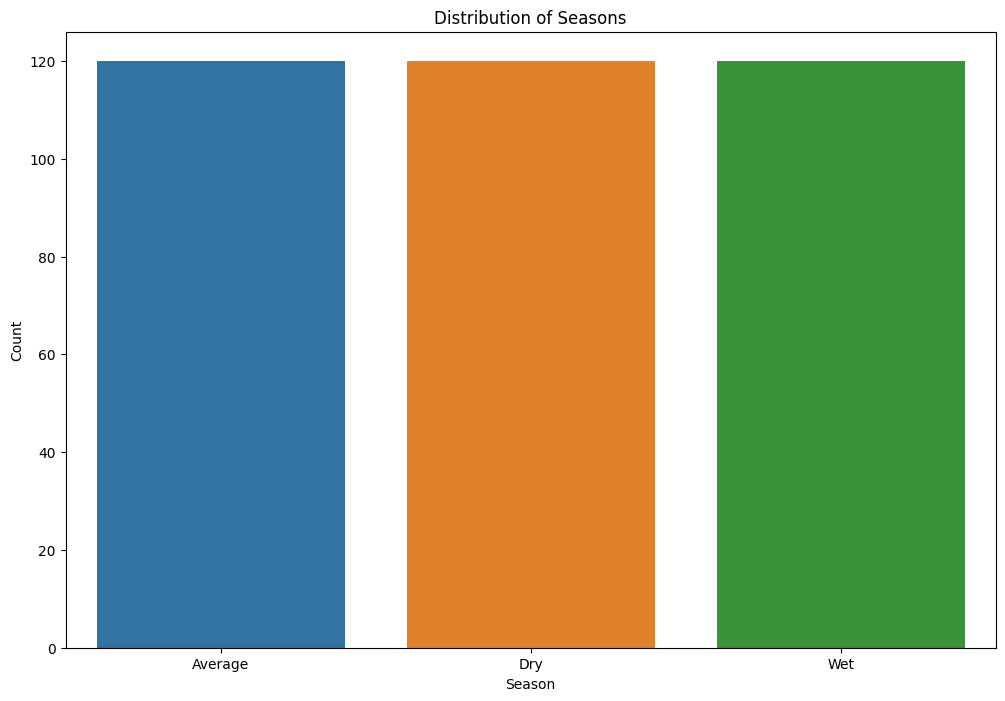

In [16]:
# Plot categorical variable 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='Type')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

# Plot categorical variable 'Season'
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

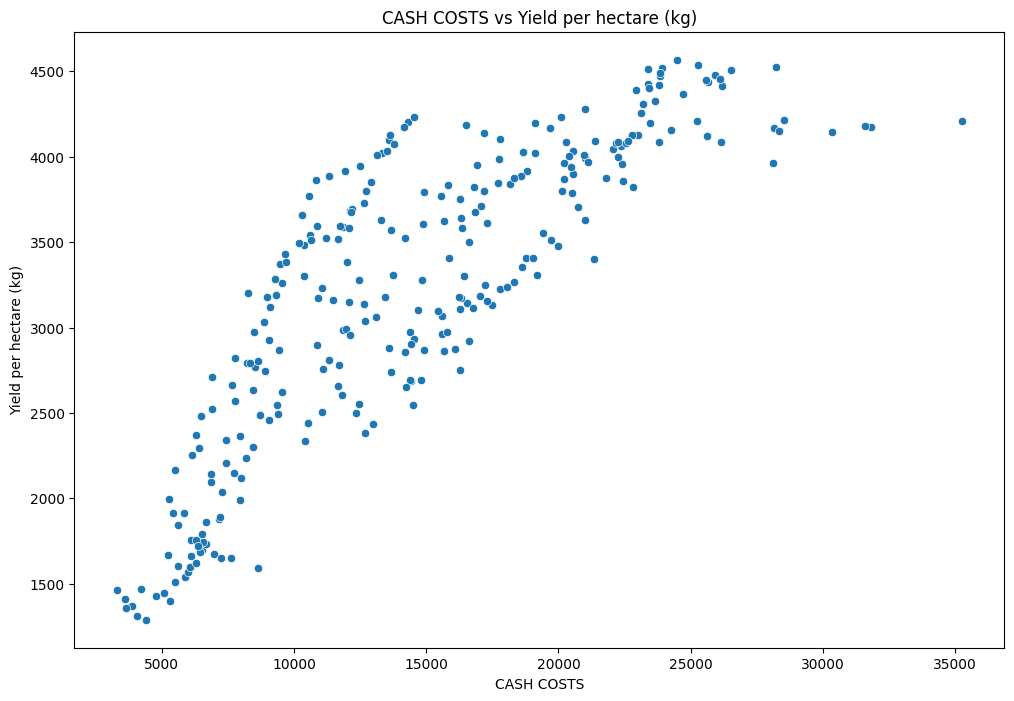

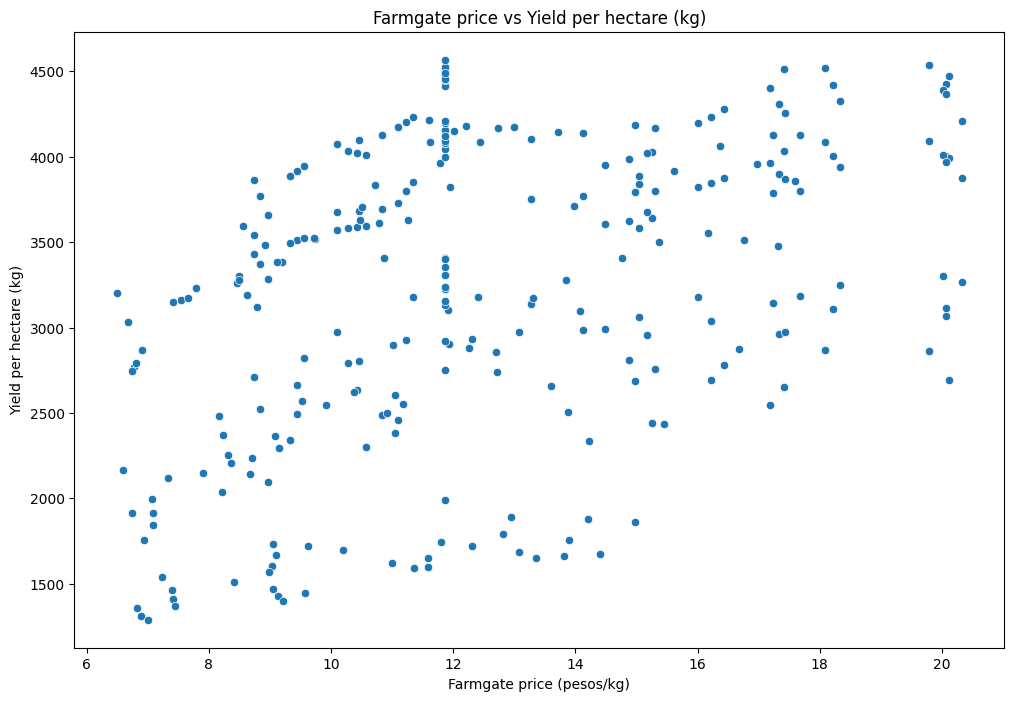

In [17]:
# Scatterplot: CASH COSTS vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='CASH COSTS', y='Yield per hectare (kg)')
plt.title('CASH COSTS vs Yield per hectare (kg)')
plt.xlabel('CASH COSTS')
plt.ylabel('Yield per hectare (kg)')
plt.show()

# Scatterplot: Farmgate price vs Gross Returns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='Farmgate price (pesos/kg)', y='Yield per hectare (kg)')
plt.title('Farmgate price vs Yield per hectare (kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Yield per hectare (kg)')
plt.show()


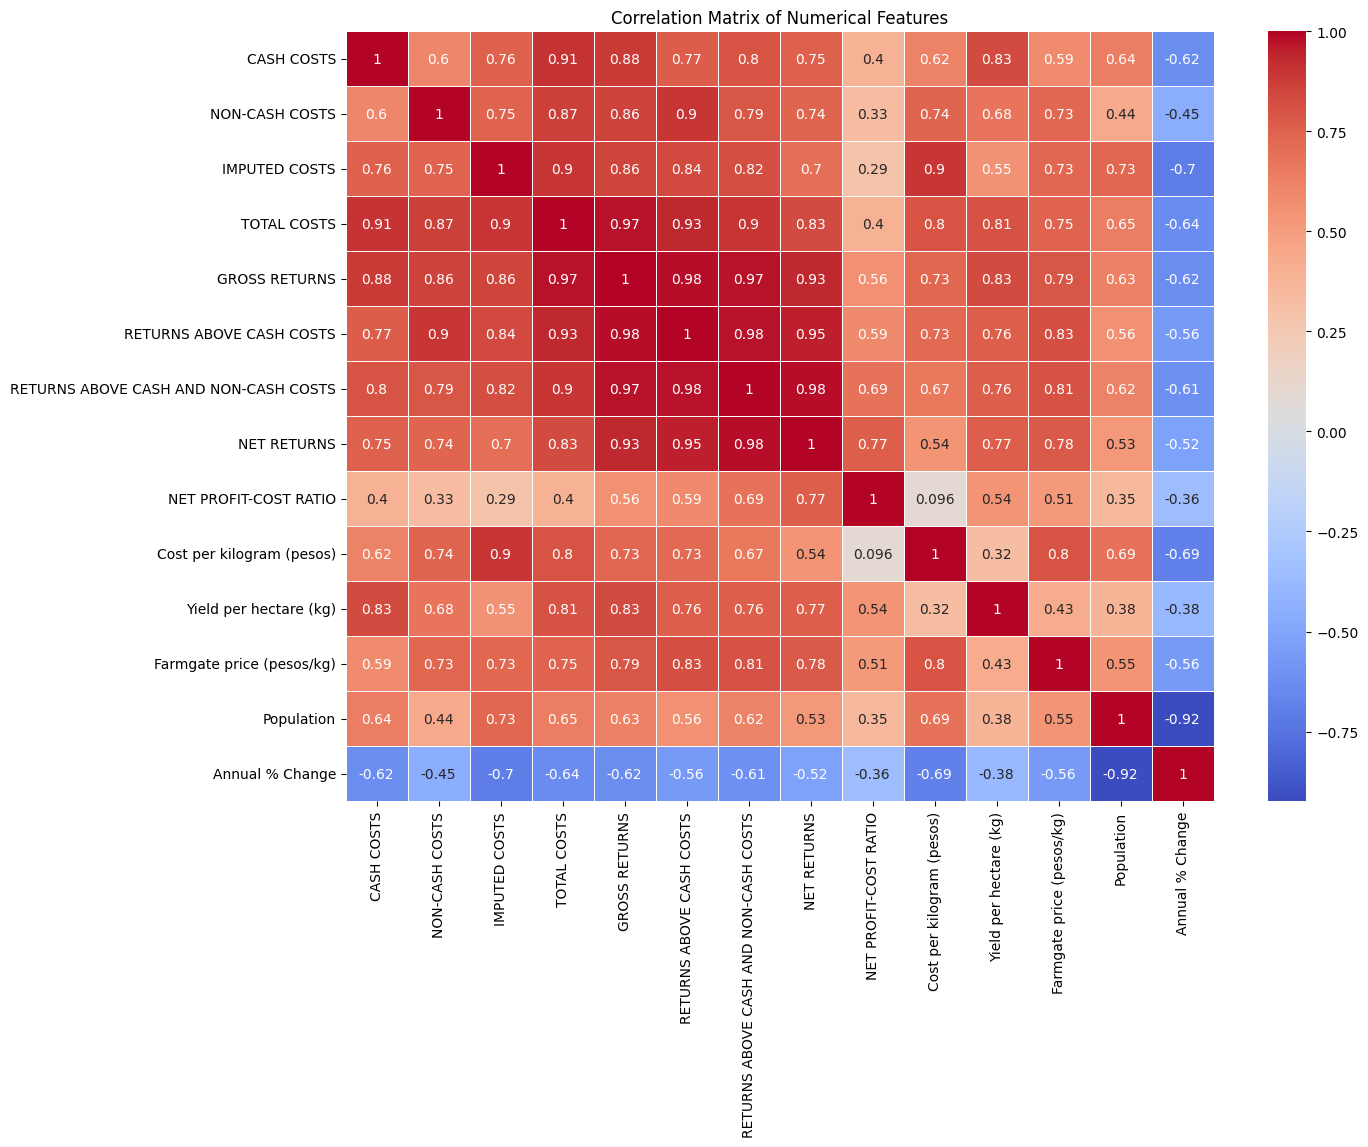

In [18]:
# Select only the numeric columns for correlation analysis
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for the numerical features
correlation_matrix = numeric_columns.corr()

# Set up the plot for a heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

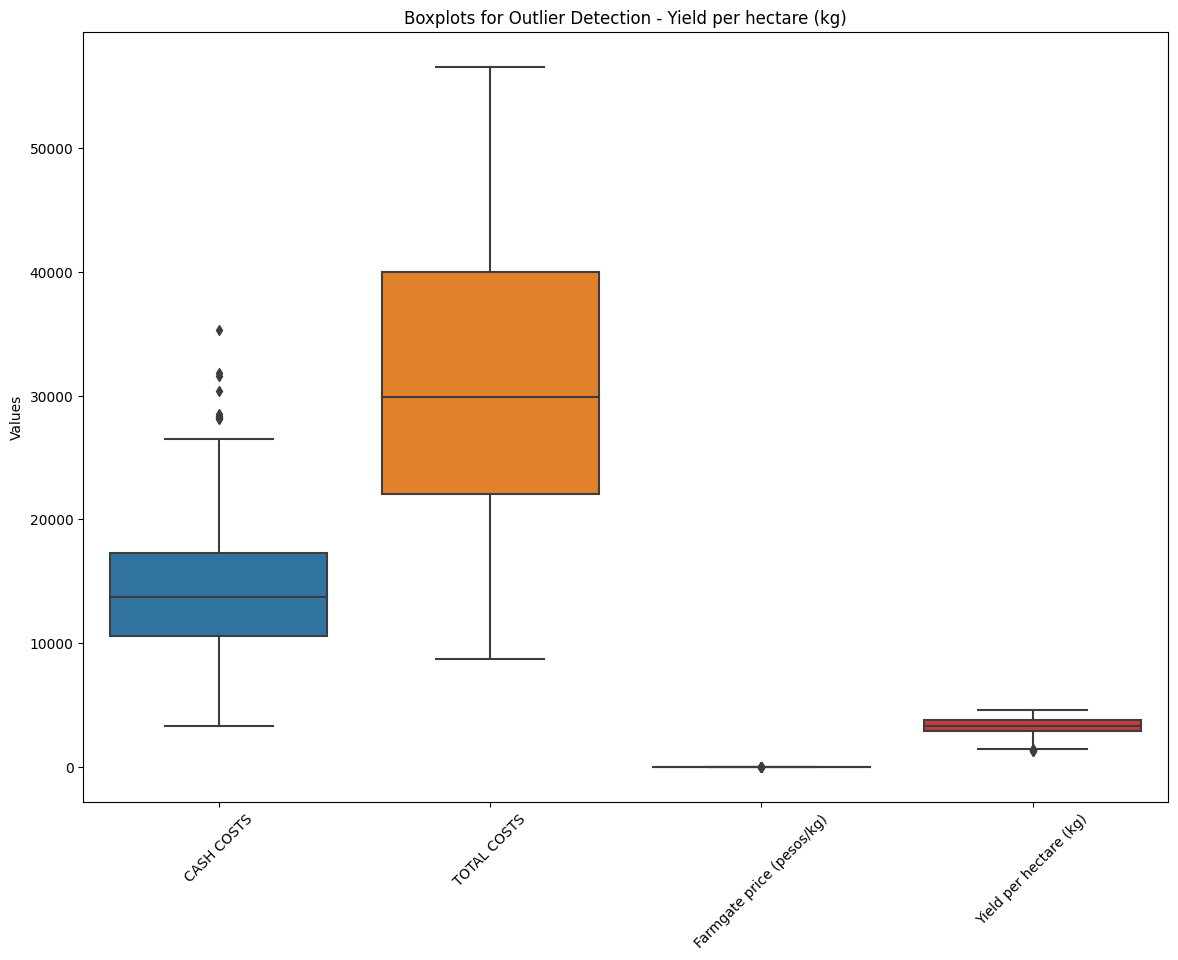

In [19]:
# Set up the figure for outlier detection using boxplots
plt.figure(figsize=(14, 10))

# Create boxplots for key numerical features to visualize outliers
sns.boxplot(data=merged_data[['CASH COSTS', 'TOTAL COSTS', 'Farmgate price (pesos/kg)', 'Yield per hectare (kg)']])
plt.title('Boxplots for Outlier Detection - Yield per hectare (kg)')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Generate summary statistics for the numerical features
summary_statistics = merged_data.describe()

# Display the summary statistics
summary_statistics

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000
mean,2011.500000,14372.508333,8517.738889,7995.013889,30788.400000,43282.069444,28464.952778,20463.113889,12308.630556,0.379722,9.410000,3232.888889,12.417861,9.732290e+07,1.805500
std,5.774307,5826.146088,4825.174537,2347.992321,11602.396019,18167.302376,13350.584771,9140.316242,7356.738422,0.148419,2.178075,775.428245,3.254388,9.897701e+06,0.145511
min,2002.000000,3293.000000,1110.000000,3489.000000,8685.000000,9036.000000,4651.000000,3408.000000,-1261.000000,-0.100000,4.560000,1289.000000,6.490000,8.128557e+07,1.510000
25%,2006.750000,10606.500000,2625.750000,6220.250000,22077.250000,30541.250000,20108.000000,14779.250000,7792.250000,0.317500,7.737500,2861.250000,10.460000,8.914649e+07,1.695000
50%,2011.500000,13740.500000,8992.500000,7620.500000,29906.500000,41870.000000,26077.500000,19466.000000,11109.500000,0.380000,9.300000,3305.000000,11.860000,9.718512e+07,1.795000
75%,2016.250000,17295.000000,12482.750000,9274.250000,39998.500000,54154.250000,37001.500000,24602.250000,15695.000000,0.440000,11.060000,3825.500000,14.265000,1.053411e+08,1.892500
max,2021.000000,35271.000000,18639.000000,13920.000000,56570.000000,89997.000000,66139.000000,48373.000000,36720.000000,0.810000,14.580000,4568.000000,20.330000,1.138803e+08,2.080000


In [21]:
# Function to cap outliers based on IQR
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    column_capped = column.clip(lower=lower_bound, upper=upper_bound)
    return column_capped

# Capping outliers for the selected numerical features
merged_data['CASH COSTS'] = cap_outliers(merged_data['CASH COSTS'])
merged_data['TOTAL COSTS'] = cap_outliers(merged_data['TOTAL COSTS'])
merged_data['Farmgate price (pesos/kg)'] = cap_outliers(merged_data['Farmgate price (pesos/kg)'])
merged_data['Yield per hectare (kg)'] = cap_outliers(merged_data['Yield per hectare (kg)'])  # Added to cap outliers in GROSS RETURNS

# Check the summary statistics after capping outliers to see the effect
summary_statistics_after_capping = merged_data.describe()

# Display the summary statistics after capping
summary_statistics_after_capping


,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02,360.000000
mean,2011.500000,14304.496528,8517.738889,7995.013889,30788.400000,43282.069444,28464.952778,20463.113889,12308.630556,0.379722,9.410000,3233.867361,12.411715,9.732290e+07,1.805500
std,5.774307,5643.648011,4825.174537,2347.992321,11602.396019,18167.302376,13350.584771,9140.316242,7356.738422,0.148419,2.178075,773.065322,3.239826,9.897701e+06,0.145511
min,2002.000000,3293.000000,1110.000000,3489.000000,8685.000000,9036.000000,4651.000000,3408.000000,-1261.000000,-0.100000,4.560000,1414.875000,6.490000,8.128557e+07,1.510000
25%,2006.750000,10606.500000,2625.750000,6220.250000,22077.250000,30541.250000,20108.000000,14779.250000,7792.250000,0.317500,7.737500,2861.250000,10.460000,8.914649e+07,1.695000
50%,2011.500000,13740.500000,8992.500000,7620.500000,29906.500000,41870.000000,26077.500000,19466.000000,11109.500000,0.380000,9.300000,3305.000000,11.860000,9.718512e+07,1.795000
75%,2016.250000,17295.000000,12482.750000,9274.250000,39998.500000,54154.250000,37001.500000,24602.250000,15695.000000,0.440000,11.060000,3825.500000,14.265000,1.053411e+08,1.892500
max,2021.000000,27327.750000,18639.000000,13920.000000,56570.000000,89997.000000,66139.000000,48373.000000,36720.000000,0.810000,14.580000,4568.000000,19.972500,1.138803e+08,2.080000


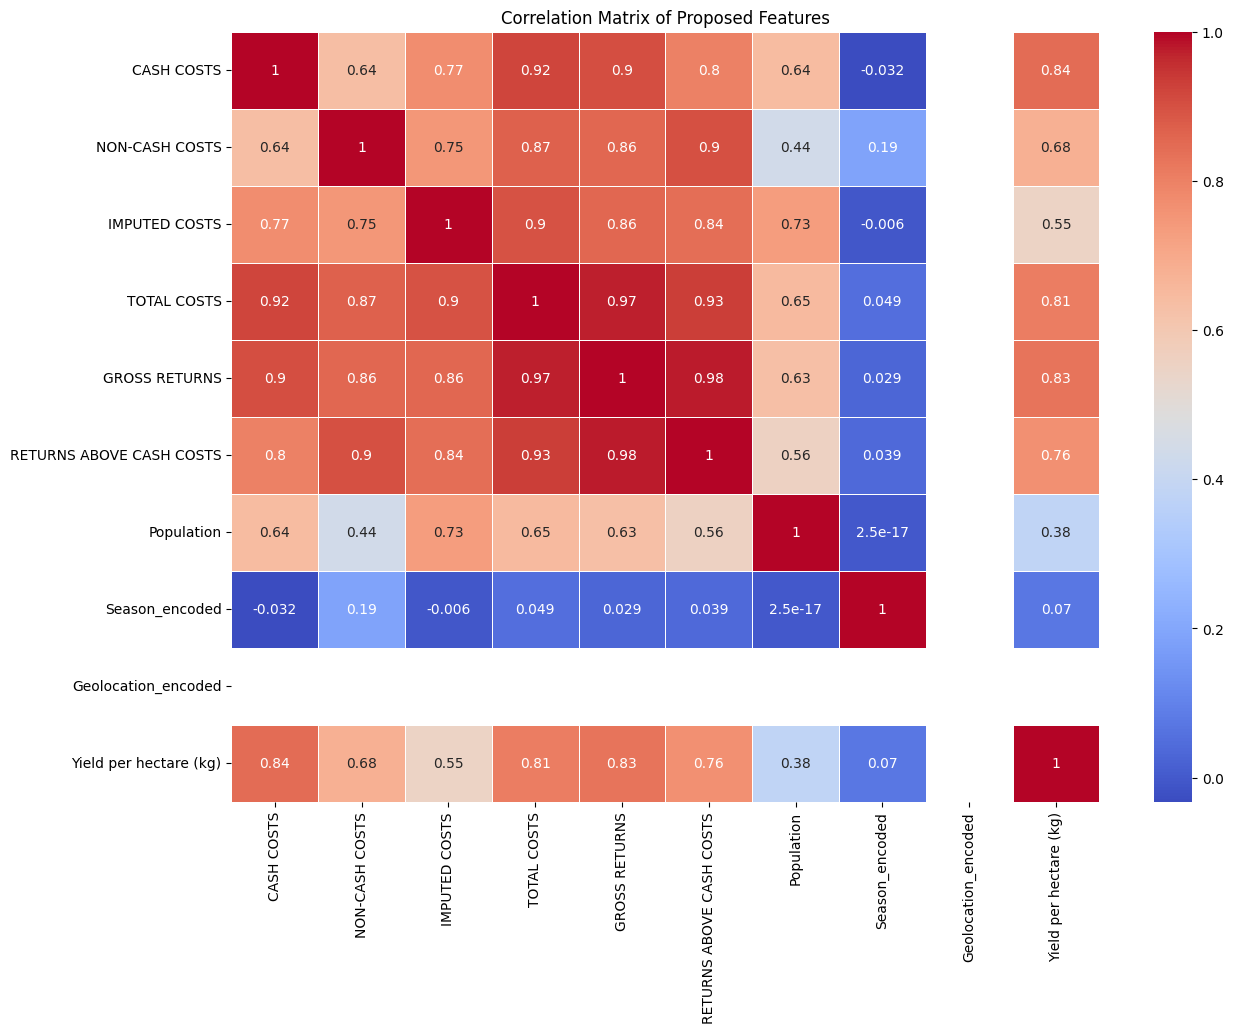

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode 'Season' and 'Geolocation'
merged_data['Season_encoded'] = label_encoder.fit_transform(merged_data['Season'])
merged_data['Geolocation_encoded'] = label_encoder.fit_transform(merged_data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the proposed features
correlation_matrix_proposed = merged_data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

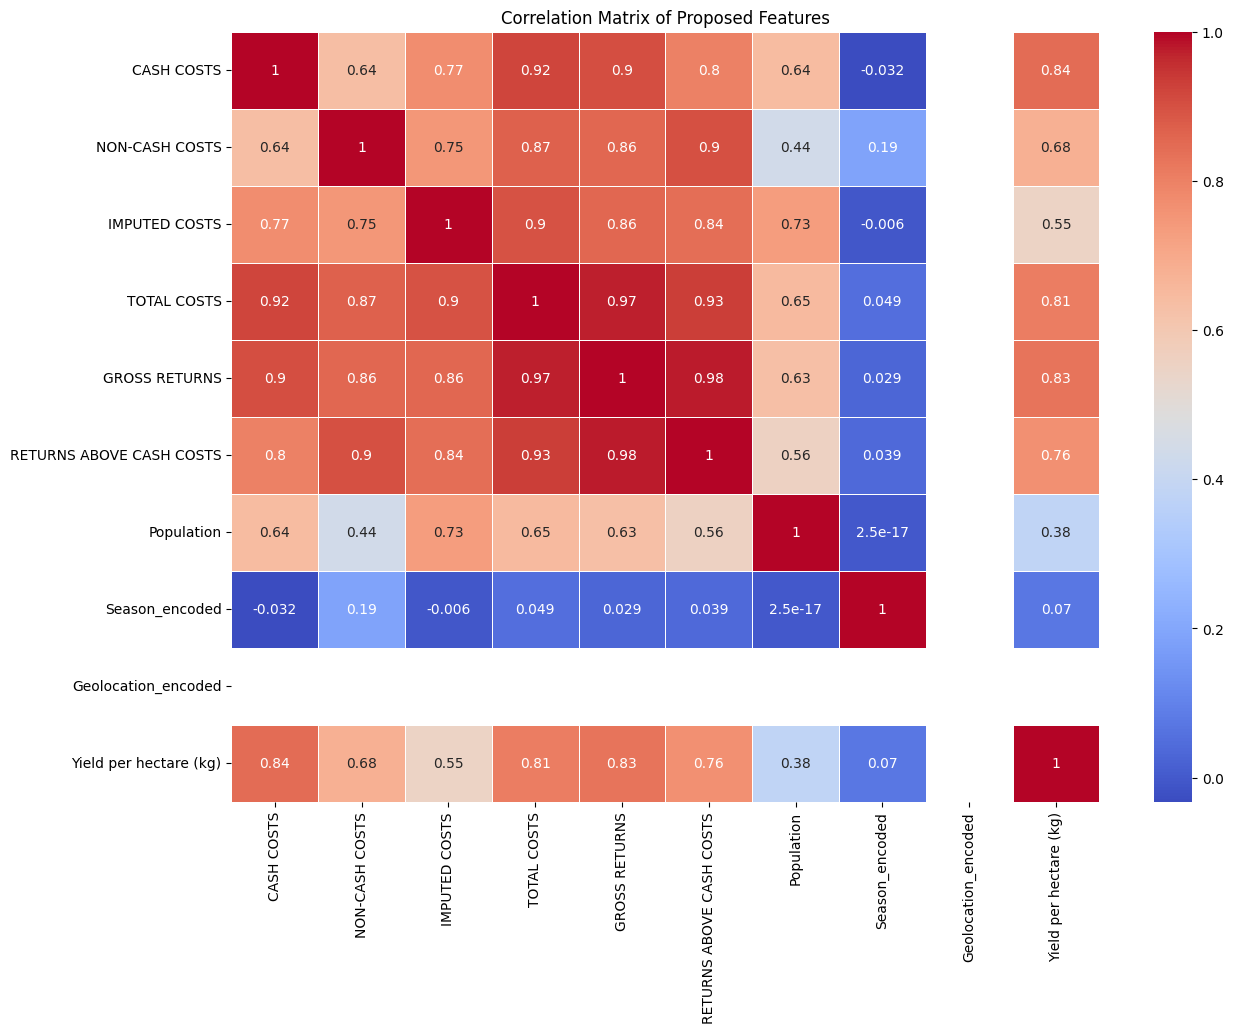

In [24]:
# Re-encode the categorical columns 'Season' and 'Geolocation' to ensure they are present
label_encoder = LabelEncoder()

# Create encoded versions of 'Season' and 'Geolocation'
merged_data['Season_encoded'] = label_encoder.fit_transform(merged_data['Season'])
merged_data['Geolocation_encoded'] = label_encoder.fit_transform(merged_data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the numerical features
correlation_matrix_proposed = merged_data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Convert 'Year' to integer if it's not already
merged_data['Year'] = merged_data['Year'].astype(int)

# Define training and testing sets based on the year
train_data = merged_data[merged_data['Year'].between(2002, 2016)]
test_data = merged_data[merged_data['Year'].between(2017, 2019)]

# Select the features and target variable
features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 
    'TOTAL COSTS', 'RETURNS ABOVE CASH COSTS', 
    'Population', 'Season_encoded', 'GROSS RETURNS'
]
target_variable = 'Yield per hectare (kg)'

# Split the features and target variable into X_train, X_test, y_train, y_test
X_train = train_data[features]
y_train = train_data[target_variable]
X_test = test_data[features]
y_test = test_data[target_variable]

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((270, 8), (54, 8), (270,), (54,))

## FINAL MODEL

In [26]:
# Ensure y_train and X_train have a valid RangeIndex (starting from 0)
y_train.index = pd.RangeIndex(start=0, stop=len(y_train), step=1)
X_train.index = pd.RangeIndex(start=0, stop=len(X_train), step=1)

# Adjust y_test and X_test similarly
y_test.index = pd.RangeIndex(start=len(y_train), stop=len(y_train) + len(y_test), step=1)
X_test.index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)


In [27]:
from sklearn.model_selection import GridSearchCV
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import backtesting_forecaster
from sklearn.metrics import mean_squared_error, r2_score




In [28]:
# Define the hyperparameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

In [29]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)


In [30]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)


In [31]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the forecaster with the best RandomForestRegressor
best_rf = RandomForestRegressor(**best_params, random_state=42)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_split=5, n_es

In [32]:
forecaster = ForecasterAutoreg(
    regressor=best_rf,
    lags=12  # Keep the lags as per your prior setting
)

# Re-train the forecaster on the training data
forecaster.fit(y=y_train, exog=X_train)


In [33]:

# Step 6: Backtesting with best hyperparameters
initial_train_size = int(len(y_train) * 0.8)
steps = 10

# Perform backtesting
mse, predictions = backtesting_forecaster(
    forecaster=forecaster,
    y=y_train,  
    exog=X_train,  
    initial_train_size=initial_train_size,
    steps=steps,
    refit=True,  
    metric='mean_squared_error'
)


  0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
# Make predictions on the test set using the optimized model
y_pred_optimized = forecaster.predict(steps=len(y_test), exog=X_test)


In [39]:
# Calculate MSE and R2 on the test set with the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Best Hyperparameters: {best_params}")
print(f"MSE with optimized model: {mse_optimized}")
print(f"R^2 with optimized model: {r2_optimized}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MSE with optimized model: 24148.541777671788
R^2 with optimized model: 0.9421905690195124


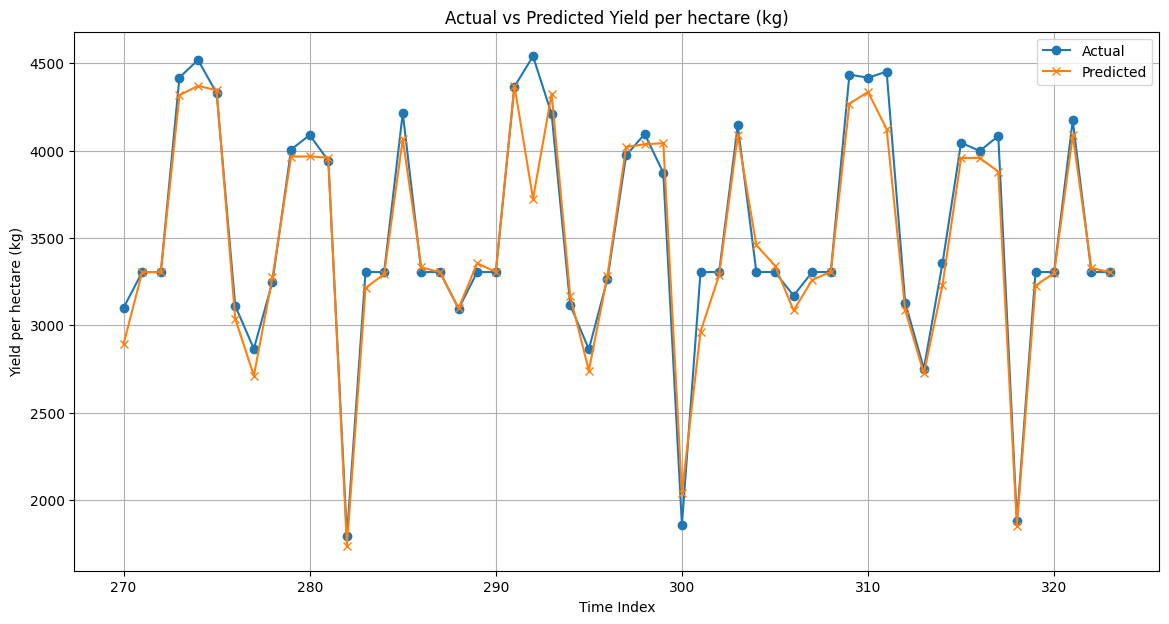

In [36]:
# Assuming y_pred_optimized and y_test are already aligned and have the same length
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_optimized, label='Predicted', marker='x')
plt.title('Actual vs Predicted Yield per hectare (kg)')
plt.xlabel('Time Index')
plt.ylabel('Yield per hectare (kg)')
plt.legend()
plt.grid(True)
plt.show()

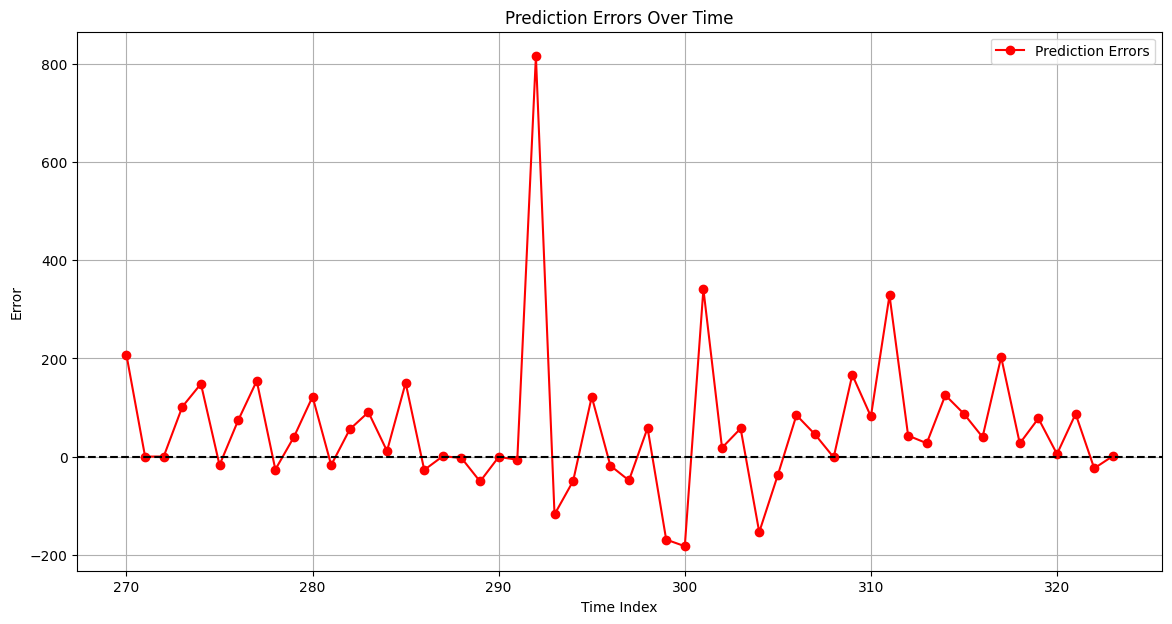

In [37]:
# Calculate prediction errors
errors = y_test - y_pred_optimized

plt.figure(figsize=(14, 7))
plt.plot(errors.index, errors, label='Prediction Errors', color='red', marker='o')
plt.axhline(y=0, color='black', linestyle='--')  # Baseline for zero error
plt.title('Prediction Errors Over Time')
plt.xlabel('Time Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


##### The dashed line at zero represents the ideal scenario where predicted values perfectly match the actual values (no error). Points above this line represent overestimations by your model, while points below indicate underestimations. The presence of large spikes both above and below the zero line suggests significant variance in the prediction accuracy across different instances. Larger spikes indicate greater discrepancies between predicted and actual values.

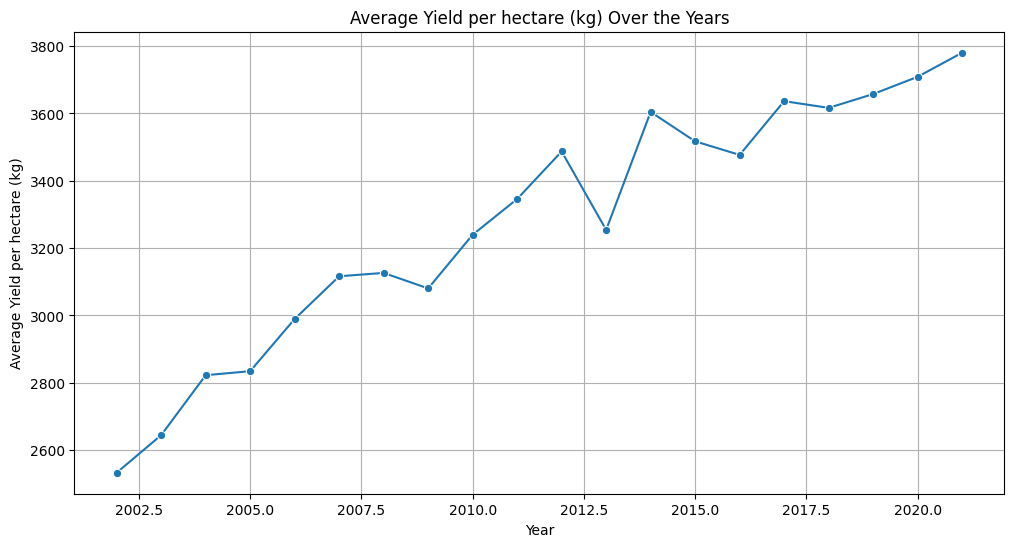

In [38]:
# Replace non-convertible values with NaN and convert the column to float
final_data['Yield per hectare (kg)'] = pd.to_numeric(final_data['Yield per hectare (kg)'], errors='coerce')

# Now let's drop any rows where 'GROSS RETURNS' could not be converted and became NaN
final_data.dropna(subset=['Yield per hectare (kg)'], inplace=True)

# Proceed with grouping and plotting as before
yearly_gross_returns = final_data.groupby('Year')['Yield per hectare (kg)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_gross_returns, x='Year', y='Yield per hectare (kg)', marker='o')
plt.title('Average Yield per hectare (kg) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield per hectare (kg)')
plt.grid(True)
plt.show()


# For the error plot, ensure residuals are properly calculated from a valid prediction process
# If residuals are available, plot them as shown before
